In [1]:
#Generating random samples from the normally distributed interest rates
import numpy as np
rate=np.random.normal(0.04, 0.01, size=(5000, 20))
print(rate)

[[0.02820445 0.03219474 0.04353215 ... 0.03275249 0.01464117 0.02777541]
 [0.03672975 0.04480286 0.04939849 ... 0.03129008 0.05564327 0.0526493 ]
 [0.04684155 0.03937923 0.02752096 ... 0.03365077 0.03402157 0.04447053]
 ...
 [0.03653047 0.0565073  0.02411989 ... 0.04720342 0.04222862 0.02279175]
 [0.04184615 0.05226512 0.03815559 ... 0.03955166 0.03843141 0.0550812 ]
 [0.06002481 0.02643685 0.05049354 ... 0.04302799 0.04831598 0.03381697]]


In [2]:
#Method 1
#Building a multiplicative function which will calculate the compounded return (of 20 years) on a given principal amount
#R is the list of rate of interests over the given period of time
def Compounded(R,p):
    total_compounded=p
    for i in range(len(R)):
        compounded_year_i=(1+R[i])
        total_compounded=total_compounded*compounded_year_i
    return(total_compounded)   

In [3]:
#Checking the result for one instance of sampling
Compounded([0.02432158, 0.04112696, 0.04631557, 0.04042804, 0.0199667,  0.03202043,
 0.03882695, 0.04043719, 0.06382018, 0.06860884, 0.05975434, 0.02728008,
 0.04171484, 0.05521078, 0.05151336, 0.0554398,  0.02563387, 0.03633402,
 0.0445956,  0.05294341],800000)

1865094.4241364049

In [4]:
#Generate all possible sample (incremented) outputs 
import statistics
p=800000
Sample_ret_1=[]
for r in range(len(rate)):
    amount=Compounded(rate[r],p)
    Sample_ret_1.append(amount)
mean_1=statistics.mean(Sample_ret_1)
var_1=statistics.variance(Sample_ret_1)
sdev_1=var_1**(1/2)
print('Mean for first method:',mean_1)
print('Variance for first method:',var_1)
print('Standard deviation first method:',sdev_1)

Mean for first method: 1754674.3926196308
Variance for first method: 5521631765.644559
Standard deviation first method: 74307.6830862365


Text(0.5, 1.0, 'Histogram of First Method (Using Compounding Formula)')

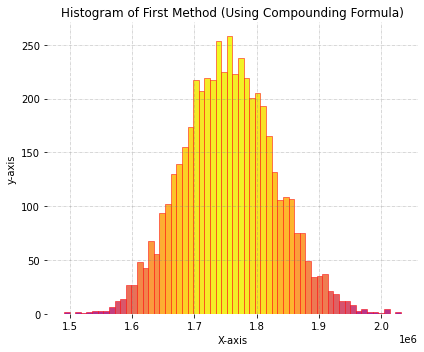

In [5]:
#Visualizing the sample in attempt to predict its distribution
from matplotlib import pyplot as plt
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Creating histogram frame
fig, axs = plt.subplots(1, 1,
                        figsize =(6, 5),
                        tight_layout = True)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False) 

# Add x, y gridlines
axs.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
 
# Creating histogram
N, bins, patches = axs.hist(Sample_ret_1, edgecolor = "red", linewidth = 0.5, bins = 60,)
 
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.plasma(norm(thisfrac))
    thispatch.set_facecolor(color)
    
# Adding extra features   
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Histogram of First Method (Using Compounding Formula)')


In [6]:
#Trying to validate whether this drawn sample follows a normal distribution or not, by Anderson-Darling Test
from scipy.stats import anderson
anderson(Sample_ret_1)

AndersonResult(statistic=0.6018516256081057, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1754674.3926196308, scale=74307.6830862365)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [7]:
#Trying to cross-validate with another effective test of normality- Shapiro-Wilk Test
from scipy import stats
shapiro_test = stats.shapiro(Sample_ret_1)
shapiro_test

ShapiroResult(statistic=0.9992867708206177, pvalue=0.04193006455898285)

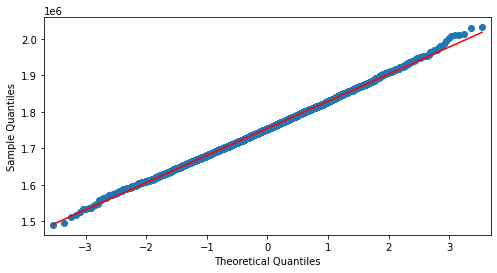

In [8]:
#QQplot is there to visualize the tendency of the distribution to be normal i.e. the proximity to be precise
import numpy as np
import statsmodels.api as sm
import pylab as py
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
  
sm.qqplot(np.array(Sample_ret_1) , line ='s', ax=ax)
plt.show()

# Observation 1:
Anderson-Darling's test is declaring the data to be normally distributed, but cross-validating with Shapiro-Wilker's test gives us a completely different scenario. The p-value is less than alpha (0.05) and we reject the null hypothesis. 
Thus, the sample is not ideally normally distributed which is further affirmed with a Q-Q plot with heavyloaded ends.

In [9]:
from scipy.stats import norm
import numpy as np

# Calculating the sample mean and standard deviation
sample_mean = np.mean(Sample_ret_1)
sample_std = np.std(Sample_ret_1, ddof=len(Sample_ret_1)-1)

# Calculating the 95% confidence interval
ci_1 = norm.interval(0.95, loc=sample_mean, scale=sample_std/np.sqrt(len(Sample_ret_1)))

print(f"95% confidence interval for first method is: {ci_1}") 

95% confidence interval for first method is: (1609048.5747625283, 1900300.2104767333)


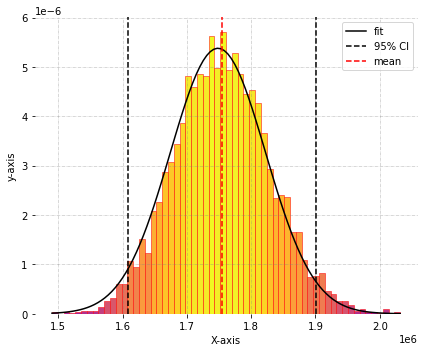

In [10]:
#Visualixing the data alongwith its mean and confidence interval
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Creating histogram frame
fig, axs = plt.subplots(1, 1,
                        figsize =(6, 5),
                        tight_layout = True)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False) 

# Add x, y gridlines
axs.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

# Plot the histogram.
N, bins, patches=plt.hist(Sample_ret_1, edgecolor = "red", linewidth = 0.5, bins = 60, density=True)

# Define the function to fit
def fit_func(x, amp, cen, sigma):
    return amp * np.exp(-(x-cen)**2/(2*sigma**2))

# Initial parameter values for fitting
initial_guess = [1.0, np.mean(Sample_ret_1), np.std(Sample_ret_1)]

# Perform the curve fit
popt, pcov = curve_fit(fit_func, bins[:-1], N, p0=initial_guess)

# Plot the histogram and fitted curve
x = np.linspace(bins[0], bins[-1], 100)
plt.plot(x, fit_func(x, *popt), color='black', linewidth=1.5, label='fit')

# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.plasma(norm(thisfrac))
    thispatch.set_facecolor(color)

l_1=ci_1[0]
u_1=ci_1[1]
axs.axvline(l_1, color='black', linestyle='--', label='95% CI')
axs.axvline(u_1, color='black', linestyle='--')
axs.axvline(mean_1, color='red', linestyle='--', label='mean')
axs.legend()
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.show()


In [11]:
#Method 2
#Building an exponential function which will calculate the compounded return (of 20 years) on a given principal amount
#R is the list of rate of interests over the given period of time
import math
def Compoundedlog(R,p):
    tot=sum(R)
    e=math.exp(tot)
    changed=p*e
    return(changed)

In [12]:
#Checking the result for one instance of sampling
Compoundedlog([0.02432158, 0.04112696, 0.04631557, 0.04042804, 0.0199667,  0.03202043,
 0.03882695, 0.04043719, 0.06382018, 0.06860884, 0.05975434, 0.02728008,
 0.04171484, 0.05521078, 0.05151336, 0.0554398,  0.02563387, 0.03633402,
 0.0445956,  0.05294341],800000)

1902462.2888895518

In [21]:
#Generate all possible sample (incremented) outputs 
p=800000
Sample_ret_2=[] 
for r in range(len(rate)):
    amount=Compoundedlog(rate[r],p)
    Sample_ret_2.append(amount)
mean_2=statistics.mean(Sample_ret_2)
var_2=statistics.variance(Sample_ret_2)
sdev_2=var_2**(1/2)
print('Mean for second method:', mean_2)
print('Variance for second method:',var_2)
print('Standard deviation for second method:',sdev_2)

Mean for second method: 1784075.4086323252
Variance for second method: 6174815676.927772
Standard deviation for second method: 78579.99539913305


Text(0.5, 1.0, 'Histogram for Second Method (Using Log Expression)')

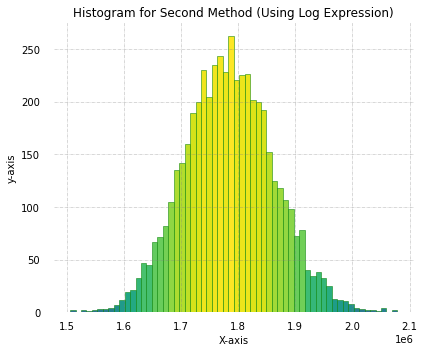

In [14]:
#Visualizing the sample in attempt to predict its distribution
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import seaborn as sns
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(6,5),
                        tight_layout = True)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False) 
# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')
   
# Add padding between axes and labels
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
axs.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
 
# Creating histogram
N, bins, patches = axs.hist(Sample_ret_2, edgecolor = "green", linewidth = 0.5, bins = 60)
 
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    

# Adding extra features 
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Histogram for Second Method (Using Log Expression)')




In [15]:
#Trying to validate whether this drawn sample follows a normal distribution or not, by Anderson-Darling Test
anderson(Sample_ret_2)

AndersonResult(statistic=0.7213879604714748, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1784075.4086323255, scale=78579.99539913305)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [16]:
#Trying to cross-validate with another effective test of normality- Shapiro-Wilk Test
from scipy import stats
shapiro_test = stats.shapiro(Sample_ret_2)
shapiro_test

ShapiroResult(statistic=0.9991615414619446, pvalue=0.01565222442150116)

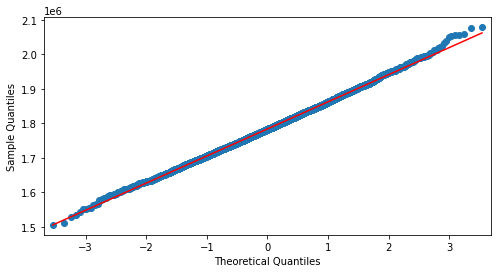

In [17]:
#QQplot is there to visualize the tendency of the distribution to be normal i.e. the proximity to be precise
import numpy as np
import statsmodels.api as sm
import pylab as py
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
# Random data points generated  
  
sm.qqplot(np.array(Sample_ret_2) , line ='s', ax=ax)
plt.show()

# Observation 2:
Anderson-Darling's test is declaring the data to be normally distributed, but cross-validating with Shapiro-Wilker's test gives us a completely different scenario. The p-value is less than alpha (0.05) and we reject the null hypothesis. 
Thus, the sample is not ideally normally distributed which is further affirmed with a Q-Q plot with heavyloaded ends.

In [18]:
from scipy.stats import norm
import numpy as np

# Calculate the sample mean and standard deviation
sample_mean = np.mean(Sample_ret_2)
sample_std = np.std(Sample_ret_2, ddof=len(Sample_ret_2)-1)

# Calculate the 95% confidence interval
ci_2 = norm.interval(0.95, loc=sample_mean, scale=sample_std/np.sqrt(len(Sample_ret_2)))

print(f"95% confidence interval for second method is: {ci_2}") 

95% confidence interval for second method is: (1630076.8499109372, 1938073.9673537137)


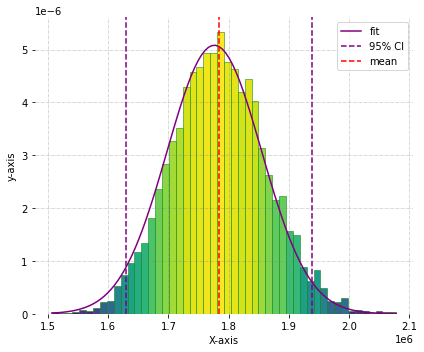

In [19]:
#Visualixing the data alongwith its mean and confidence interval
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Creating histogram frame
fig, axs = plt.subplots(1, 1,
                        figsize =(6, 5),
                        tight_layout = True)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False) 

# Add x, y gridlines
axs.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

# Plot the histogram.
N, bins, patches=plt.hist(Sample_ret_2, bins=50, edgecolor = "green", linewidth = 0.5, density=True)

# Define the function to fit
def fit_func(x, amp, cen, sigma):
    return amp * np.exp(-(x-cen)**2/(2*sigma**2))

# Initial parameter values for fitting
initial_guess = [1.0, np.mean(Sample_ret_2), np.std(Sample_ret_2)]

# Perform the curve fit
popt, pcov = curve_fit(fit_func, bins[:-1], N, p0=initial_guess)

# Plot the histogram and fitted curve
x = np.linspace(bins[0], bins[-1], 100)
plt.plot(x, fit_func(x, *popt), color='purple', linewidth=1.5, label='fit')

# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

l_2=ci_2[0]
u_2=ci_2[1]
axs.axvline(l_2, color='purple', linestyle='--', label='95% CI')
axs.axvline(u_2, color='purple', linestyle='--')
axs.axvline(mean_2, color='red', linestyle='--', label='mean')
axs.legend()
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.show()

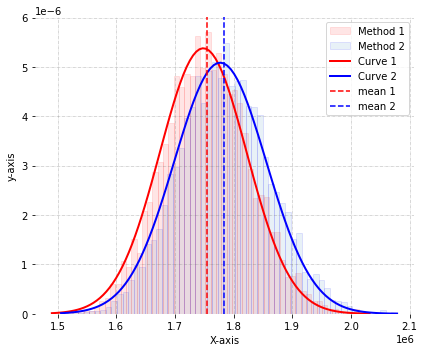

In [20]:
# Plot histograms of the two data sets on the same plot
# Creating histogram frame
fig, axs = plt.subplots(1, 1,
                        figsize =(6, 5),
                        tight_layout = True)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False) 

# Add x, y gridlines
axs.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)


data1=Sample_ret_1
data2=Sample_ret_2

# Plot histograms of the two data sets on the same plot
n1, bins1, patches1 = plt.hist(data1, color='red', bins=60, edgecolor = "red", alpha=0.1, density=True, label='Method 1')
n2, bins2, patches2 = plt.hist(data2, bins=60, edgecolor = "blue", alpha=0.1, density=True, label='Method 2')

# Define the function to fit
def fit_func(x, amp, cen, sigma):
    return amp * np.exp(-(x-cen)**2/(2*sigma**2))

# Perform the curve fit on the first data set

popt1, pcov1 = curve_fit(fit_func, bins1[:-1], n1, p0=[1.0,np.mean(data1), np.std(data1)])
x1 = np.linspace(bins1[0], bins1[-1], 100)
plt.plot(x1, fit_func(x1, *popt1), color='red', linewidth=2, label='Curve 1')

# Perform the curve fit on the second data set
popt2, pcov2 = curve_fit(fit_func, bins2[:-1], n2, p0=[1.0, np.mean(data2), np.std(data2)])
x2 = np.linspace(bins2[0], bins2[-1], 100)
plt.plot(x2, fit_func(x2, *popt2), color='blue', linewidth=2, label='Curve 2')

axs.axvline(mean_1, color='red', linestyle='--', label='mean 1')
axs.axvline(mean_2, color='blue', linestyle='--', label='mean 2')

# Add a legend and labels to the plot
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.legend()




# Conclusion

## Context
To study MSc Data Science, it costs Rs. 8 lakhs today. The underlying assumption is, annual inflation rate follows N(mean = 0.04, sd= 0.01). 

## Objective: 
Predicting the cost of the same course after 20 years from now under the following circumstances.

## Brief of our findings:
We have experimented through both the methods (Method 1- Multiplicative & Method 2- Exponential) and have arrived at the following conclusions:
- Method 1 predicts the cost to be Rs. 17,54674.39 on an average, while the 95% confidence interval being (16,09048.58, 19,00300.21)
- Method 2 predicts the cost to be Rs. 17,84075.41 on an average, while the 95% confidence interval being ((16,30076.85, 19,38073.97)
(numerical values are rounded off to two decimal places)
